# UMAP clustering

## Load libraries

In [1]:
# https://github.com/lmcinnes/umap/blob/master/doc/clustering.rst

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

## Set up plotting and load data

In [3]:
sns.set(style='white', rc={'figure.figsize': (10, 8)})
mnist = fetch_mldata('MNIST Original')

## UMAP

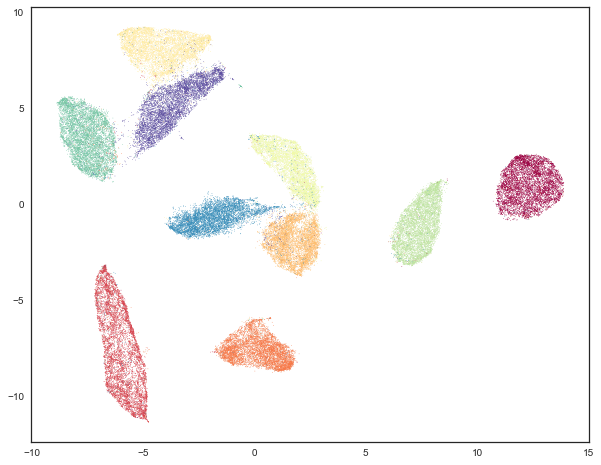

In [4]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(mnist.data)

plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1],
            c=mnist.target, s=0.1, cmap='Spectral')

## K-means

(0.3651646805563966, 0.48347646464684496)

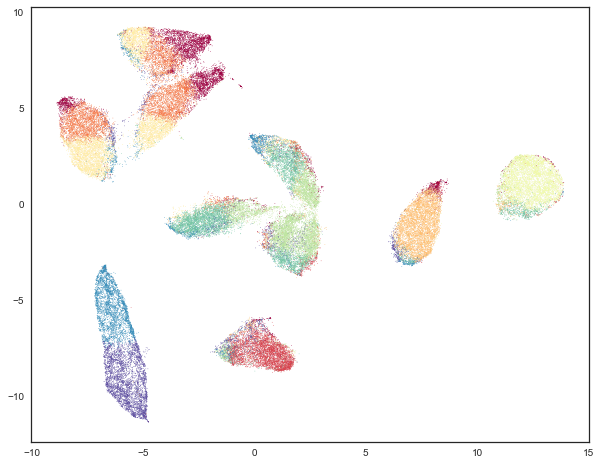

In [5]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(mnist.data)

plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1],
            c=kmeans_labels, s=0.1, cmap='Spectral')

(
 adjusted_rand_score(mnist.target, kmeans_labels),
 adjusted_mutual_info_score(mnist.target, kmeans_labels)
)

## HDBSCAN

In [7]:
lowd_mnist = PCA(n_components=50).fit_transform(mnist.data)
hdbscan_labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit_predict(lowd_mnist)

(0.053790065549587, 0.19733895905810897)

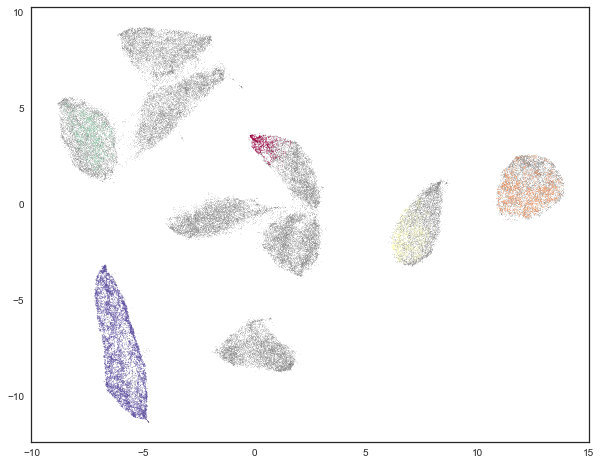

In [10]:
clustered = (hdbscan_labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=hdbscan_labels[clustered],
            s=0.1,
            cmap='Spectral')

(
    adjusted_rand_score(mnist.target, hdbscan_labels),
    adjusted_mutual_info_score(mnist.target, hdbscan_labels)
)

In [11]:
clustered = (hdbscan_labels >= 0)

(
    adjusted_rand_score(mnist.target[clustered], hdbscan_labels[clustered]),
    adjusted_mutual_info_score(mnist.target[clustered],
                               hdbscan_labels[clustered])
)

np.sum(clustered) / mnist.data.shape[0]

0.17054285714285713

## UMAP enhanced clustering

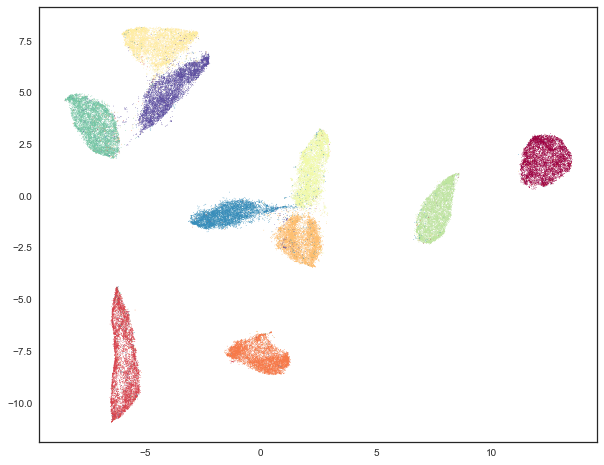

In [12]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(mnist.data)

plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=mnist.target, s=0.1, cmap='Spectral')

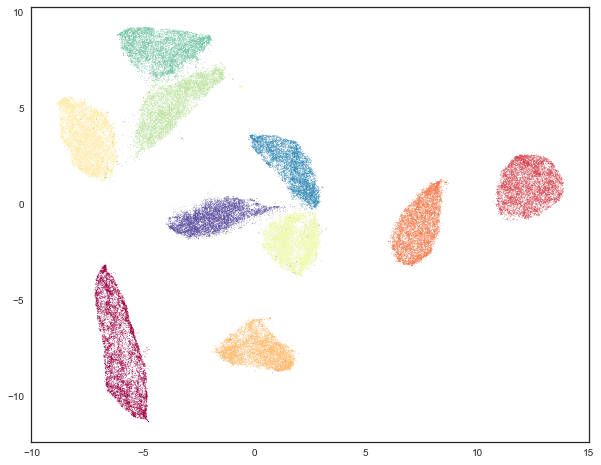

In [13]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

clustered = (labels >= 0)

plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)

plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral')

In [14]:
adjusted_rand_score(mnist.target, labels),
adjusted_mutual_info_score(mnist.target, labels)

clustered = (labels >= 0)

(
    adjusted_rand_score(mnist.target[clustered], labels[clustered]),
    adjusted_mutual_info_score(mnist.target[clustered], labels[clustered])
)

np.sum(clustered) / mnist.data.shape[0]

0.9916428571428572